In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
df1=pd.read_csv('advertising.csv')
df1.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df2=pd.read_csv('faa_ai_prelim - faa_ai_prelim.csv')
df2.head()

,UPDATED,ENTRY_DATE,EVENT_LCL_DATE,EVENT_LCL_TIME,LOC_CITY_NAME,LOC_STATE_NAME,LOC_CNTRY_NAME,RMK_TEXT,EVENT_TYPE_DESC,FSDO_DESC,...,PAX_INJ_NONE,PAX_INJ_MINOR,PAX_INJ_SERIOUS,PAX_INJ_FATAL,PAX_INJ_UNK,GRND_INJ_NONE,GRND_INJ_MINOR,GRND_INJ_SERIOUS,GRND_INJ_FATAL,GRND_INJ_UNK
0,No,19-Feb-16,19-Feb-16,00:45:00Z,MARSHVILLE,North Carolina,NaN,"AIRCRAFT CRASHED INTO TREES, THE 1 PERSON ON B...",Accident,FAA Charlotte FSDO-68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,No,19-Feb-16,18-Feb-16,23:55:00Z,TAVERNIER,Florida,NaN,AIRCRAFT ON LANDING WENT OFF THE END OF THE RU...,Incident,FAA Miami FSDO-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,No,19-Feb-16,18-Feb-16,22:14:00Z,TRENTON,New Jersey,NaN,"AIRCRAFT ON FINAL SUSTAINED A BIRD STRIKE, LAN...",Incident,FAA Philadelphia FSDO-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,No,19-Feb-16,18-Feb-16,17:10:00Z,ASHEVILLE,North Carolina,NaN,"AIRCRAFT ON LANDING, GEAR COLLAPSED, ASHEVILLE...",Incident,FAA Charlotte FSDO-68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,No,19-Feb-16,18-Feb-16,00:26:00Z,TALKEETNA,Alaska,NaN,"AIRCRAFT ON LANDING, NOSE GEAR COLLAPSED, TALK...",Incident,FAA Anchorage FSDO-03,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df[binary_cols] = df[binary_cols].apply(lambda x: x.map({'yes': 1, 'no': 0}))

df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)
df.sample(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
206,4900000,5800,2,1,1,1,1,1,0,1,0,0,True,False
455,3129000,5495,3,1,1,1,0,1,0,0,0,0,False,True
120,5950000,6540,3,1,1,1,1,1,0,0,2,1,False,False
148,5600000,6360,3,1,3,1,0,0,0,0,0,1,True,False
470,3010000,5076,3,1,1,0,0,0,0,0,0,0,False,True


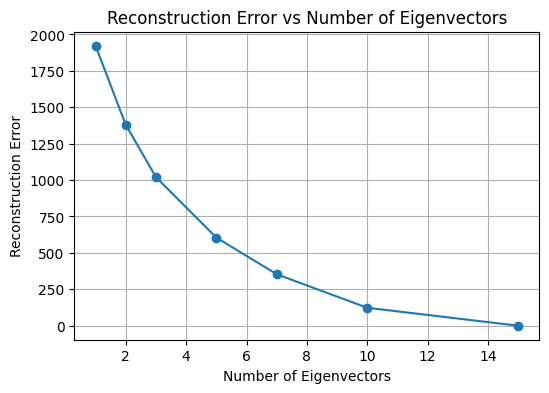

[np.float64(1922.4216596944862),
 np.float64(1379.9049645010728),
 np.float64(1020.3790685488309),
 np.float64(605.2114787685318),
 np.float64(353.625614674139),
 np.float64(123.2121931459352),
 np.float64(1.2490654555328326e-22)]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def eigenface_reconstruction_error(X, n_values=[1, 2, 3, 5, 7, 10, 15]):
    # Step 1: Convert to numpy
    X = np.array(X, dtype=float)

    # Step 2: Mean centering
    mu = np.mean(X, axis=0)
    A = X - mu

    # Step 3: Covariance matrix trick (A^T A)
    ATA = np.dot(A.T, A)
    eigvals, eigvecs = np.linalg.eigh(ATA)  # eigh for symmetric matrices

    # Step 4: Sort eigenvalues/vectors in descending order
    idx = np.argsort(eigvals)[::-1]
    eigvals = eigvals[idx]
    eigvecs = eigvecs[:, idx]

    errors = []

    # Step 5: Loop over number of eigenvectors
    for n in n_values:
        top_eigvecs = eigvecs[:, :n]  # take top n eigenvectors

        # Projection (weights)
        W = np.dot(A, top_eigvecs)

        # Reconstruction
        L = np.dot(W, top_eigvecs.T)
        R = L + mu

        # Reconstruction error
        error = np.sum((X - R) ** 2)
        errors.append(error)

    # Step 6: Plot
    plt.figure(figsize=(6, 4))
    plt.plot(n_values, errors, marker='o')
    plt.xlabel('Number of Eigenvectors')
    plt.ylabel('Reconstruction Error')
    plt.title('Reconstruction Error vs Number of Eigenvectors')
    plt.grid(True)
    plt.show()

    return errors

# Example usage:
# Assuming df is your dataset without label column
X = df.drop('price', axis=1)
eigenface_reconstruction_error(X)

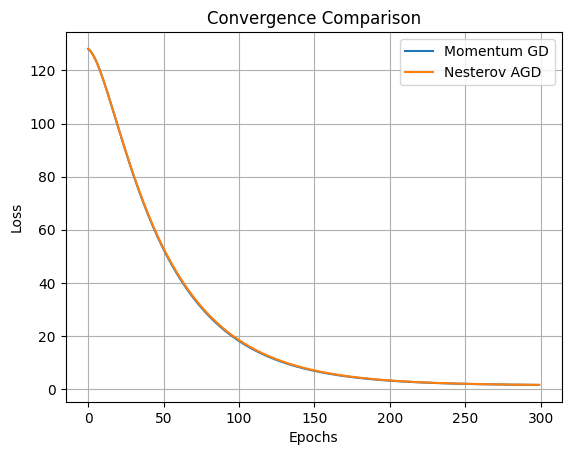

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def compute_loss(X, y, w):
    n = len(y)
    y_pred = X @ w
    return (1/(2*n)) * np.sum((y_pred - y) ** 2)

# Gradient
def compute_grad(X, y, w):
    n = len(y)
    y_pred = X @ w
    return (1/n) * (X.T @ (y_pred - y))

def gradient_descent(X, y, lr=0.01, epochs=100):
    w = np.zeros(X.shape[1])
    losses = []
    for _ in range(epochs):
        grad = compute_grad(X, y, w)
        w -= lr * grad
        losses.append(compute_loss(X, y, w))
    return w, losses

def momentum_gd(X, y, lr=0.01, gamma=0.9, epochs=100):
    w = np.zeros(X.shape[1],dtype=float)
    v = np.zeros_like(w)
    losses = []
    for _ in range(epochs):
        grad = compute_grad(X, y, w)
        v = gamma * v + lr * grad
        w -= v
        losses.append(compute_loss(X, y, w))
    return w, losses

def nesterov_gd(X, y, lr=0.01, gamma=0.9, epochs=100):
    w = np.zeros(X.shape[1])
    v = np.zeros_like(w)
    losses = []
    for _ in range(epochs):
        grad = compute_grad(X, y, w - gamma * v)   # lookahead
        v = gamma * v + lr * grad
        w -= v
        losses.append(compute_loss(X, y, w))
    return w, losses

#X =  df.drop('price', axis=1).values
#y = df['price'].values

X = df1.drop('Sales', axis=1).values
y = df1['Sales'].values

#NOTE: when we havent standaradized, loss was increasing with no. of epochs
# Standardize features (exclude bias column)
X_mean = X.mean(axis=0)
X_std  = X.std(axis=0)
X = (X - X_mean) / X_std

# Add bias term
X = np.c_[np.ones(X.shape[0]), X]

# Train using the 2 methods
w_mgd, loss_mgd = momentum_gd(X, y, lr=0.001, gamma=0.9, epochs=300)
w_nag, loss_nag = nesterov_gd(X, y, lr=0.001, gamma=0.9, epochs=300)

#print(loss_nag)
plt.plot(loss_mgd, label="Momentum GD",)
plt.plot(loss_nag, label="Nesterov AGD")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Convergence Comparison")
plt.grid()
plt.show()

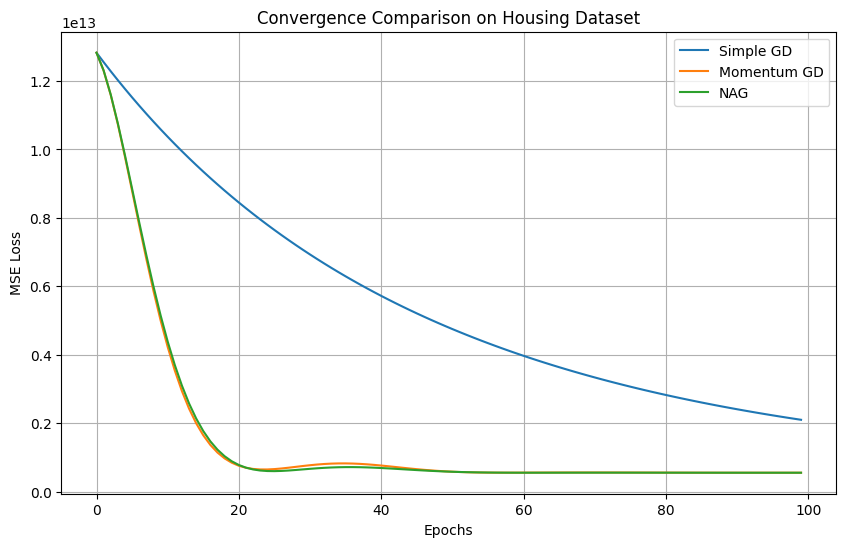

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# -----------------------------
# 1. Load Dataset
# -----------------------------
df = pd.read_csv("Housing.csv")

# Convert binary categorical columns to numerical (0s and 1s)
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df[binary_cols] = df[binary_cols].apply(lambda x: x.map({'yes': 1, 'no': 0}))

# Convert multi-category column 'furnishingstatus' using one-hot encoding
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)


# Assume target column is 'median_house_value' (change if different)
y = df['price'].values
X = df.drop(columns=['price']).values

# Handle missing values (if any)
X = np.nan_to_num(X)

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Add bias term
X = np.c_[np.ones(X.shape[0]), X]

# -----------------------------
# 2. Helper Functions
# -----------------------------
def mse_loss(X, y, w):
    """ Mean Squared Error """
    y_pred = X.dot(w)
    return np.mean((y - y_pred) ** 2) / 2

def gradient(X, y, w):
    """ Gradient of MSE """
    return -(X.T.dot(y - X.dot(w))) / len(y)

# -----------------------------
# 3. Gradient Descent Variants
# -----------------------------
def gradient_descent(X, y, lr=0.01, epochs=100, method="sgd", gamma=0.9):
    n_features = X.shape[1]
    w = np.zeros(n_features)   # Initialize weights
    v = np.zeros(n_features)   # For momentum methods
    losses = []

    for epoch in range(epochs):
        if method == "sgd":  # Simple GD
            grad = gradient(X, y, w)
            w -= lr * grad

        elif method == "momentum":  # Momentum GD
            grad = gradient(X, y, w)
            v = gamma * v + lr * grad
            w -= v

        elif method == "nag":  # Nesterov Accelerated Gradient
            grad = gradient(X, y, w - gamma * v)
            v = gamma * v + lr * grad
            w -= v

        # Record loss
        losses.append(mse_loss(X, y, w))

    return w, losses

# -----------------------------
# 4. Run All Methods
# -----------------------------
epochs = 100
lr = 0.01
gamma = 0.9

w_sgd, loss_sgd = gradient_descent(X, y, lr, epochs, method="sgd", gamma=gamma)
w_mom, loss_mom = gradient_descent(X, y, lr, epochs, method="momentum", gamma=gamma)
w_nag, loss_nag = gradient_descent(X, y, lr, epochs, method="nag", gamma=gamma)

# -----------------------------
# 5. Plot Comparison
# -----------------------------
plt.figure(figsize=(10,6))
plt.plot(loss_sgd, label="Simple GD")
plt.plot(loss_mom, label="Momentum GD")
plt.plot(loss_nag, label="NAG")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Convergence Comparison on Housing Dataset")
plt.legend()
plt.grid(True)
plt.show()

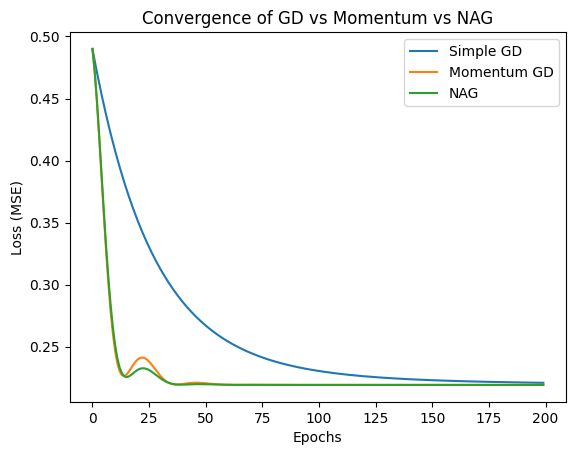

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# =============================
# Load Dataset (Housing.csv)
# =============================
data = pd.read_csv("Housing.csv")

# Drop categorical columns if any (focus only on numeric for regression)
data = data.select_dtypes(include=[np.number]).dropna()

# Separate features (X) and target (y)
X = data.drop(columns=['price'], errors='ignore').values  # replace 'price' with your target column
y = data['price'].values if 'price' in data.columns else data.iloc[:, -1].values

# Normalize features
X = (X - X.mean(axis=0)) / X.std(axis=0)
y = (y - y.mean()) / y.std()

# Add bias term (intercept)
X = np.c_[np.ones(X.shape[0]), X]

# =============================
# Loss function and gradient
# =============================
def compute_loss(X, y, w):
    m = len(y)
    y_pred = X.dot(w)
    return (1/(2*m)) * np.sum((y_pred - y)**2)

def compute_gradient(X, y, w):
    m = len(y)
    return (1/m) * X.T.dot(X.dot(w) - y)

# =============================
# Simple Gradient Descent
# =============================
def gradient_descent(X, y, lr=0.01, epochs=1000):
    w = np.zeros(X.shape[1])
    losses = []
    for _ in range(epochs):
        grad = compute_gradient(X, y, w)
        w -= lr * grad
        losses.append(compute_loss(X, y, w))
    return w, losses

# =============================
# Momentum Gradient Descent
# =============================
def momentum_gd(X, y, lr=0.01, epochs=1000, gamma=0.9):
    w = np.zeros(X.shape[1])
    v = np.zeros_like(w)
    losses = []
    for _ in range(epochs):
        grad = compute_gradient(X, y, w)
        v = gamma * v + lr * grad
        w -= v
        losses.append(compute_loss(X, y, w))
    return w, losses

# =============================
# Nesterov Accelerated Gradient (NAG)
# =============================
def nag_gd(X, y, lr=0.01, epochs=1000, gamma=0.9):
    w = np.zeros(X.shape[1])
    v = np.zeros_like(w)
    losses = []
    for _ in range(epochs):
        grad = compute_gradient(X, y, w - gamma*v)  # lookahead
        v = gamma * v + lr * grad
        w -= v
        losses.append(compute_loss(X, y, w))
    return w, losses

# =============================
# Run Experiments
# =============================
epochs = 200
lr = 0.01

w_gd, losses_gd = gradient_descent(X, y, lr, epochs)
w_momentum, losses_momentum = momentum_gd(X, y, lr, epochs)
w_nag, losses_nag = nag_gd(X, y, lr, epochs)

# =============================
# Plot Comparison
# =============================
plt.plot(losses_gd, label="Simple GD")
plt.plot(losses_momentum, label="Momentum GD")
plt.plot(losses_nag, label="NAG")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Convergence of GD vs Momentum vs NAG")
plt.legend()
plt.show()



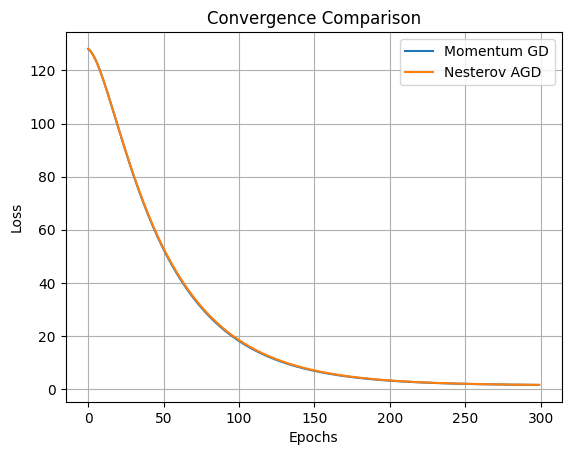

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def compute_loss(X, y, w):
    n = len(y)
    y_pred = X @ w
    return (1/(2*n)) * np.sum((y_pred - y) ** 2)

# Gradient
def compute_grad(X, y, w):
    n = len(y)
    y_pred = X @ w
    return (1/n) * (X.T @ (y_pred - y))
"""
def gradient_descent(X, y, lr=0.01, epochs=100):
    w = np.zeros(X.shape[1])
    losses = []
    for _ in range(epochs):
        grad = compute_grad(X, y, w)
        w -= lr * grad
        losses.append(compute_loss(X, y, w))
    return w, losses
"""
def momentum_gd(X, y, lr=0.01, gamma=0.9, epochs=100):
    w = np.zeros(X.shape[1],dtype=float)
    v = np.zeros_like(w)
    losses = []
    for _ in range(epochs):
        grad = compute_grad(X, y, w)
        v = gamma * v + lr * grad
        w -= v
        losses.append(compute_loss(X, y, w))
    return w, losses

def nesterov_gd(X, y, lr=0.01, gamma=0.9, epochs=100):
    w = np.zeros(X.shape[1])
    v = np.zeros_like(w)
    losses = []
    for _ in range(epochs):
        grad = compute_grad(X, y, w - gamma * v)   # lookahead
        v = gamma * v + lr * grad
        w -= v
        losses.append(compute_loss(X, y, w))
    return w, losses

#X =  df.drop('price', axis=1).values
#y = df['price'].values

X = df1.drop('Sales', axis=1).values
y = df1['Sales'].values

#NOTE: when we havent standaradized, loss was increasing with no. of epochs
# Standardize features (exclude bias column)
X_mean = X.mean(axis=0)
X_std  = X.std(axis=0)
X = (X - X_mean) / X_std

# Add bias term
X = np.c_[np.ones(X.shape[0]), X]

# Train using the 2 methods
w_mgd, loss_mgd = momentum_gd(X, y, lr=0.001, gamma=0.9, epochs=300)
w_nag, loss_nag = nesterov_gd(X, y, lr=0.001, gamma=0.9, epochs=300)

#print(loss_nag)
plt.plot(loss_mgd, label="Momentum GD",)
plt.plot(loss_nag, label="Nesterov AGD")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Convergence Comparison")
plt.grid()
plt.show()
